<a href="https://colab.research.google.com/github/35Upesh/Machine-Learning-Algorithms/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
# Load the dataset
df_start = pd.read_csv('50_Startups.csv')

In [5]:
df_start.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
# Analayze data
df_start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df_start.shape

(50, 5)

<ipython-input-9-ed333303ac81>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_start['Profit'])


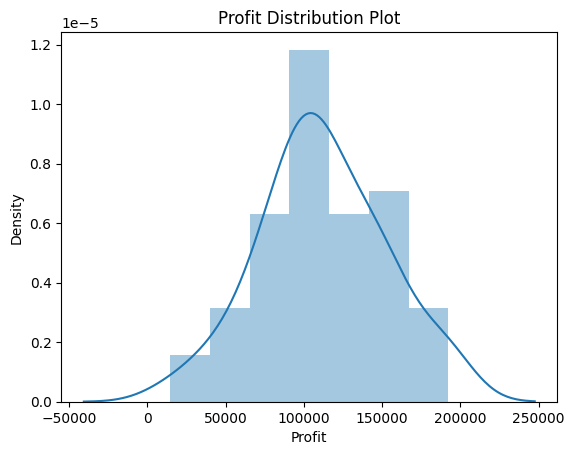

In [9]:
# Distribution
plt.title('Profit Distribution Plot')
sns.distplot(df_start['Profit'])
plt.show()

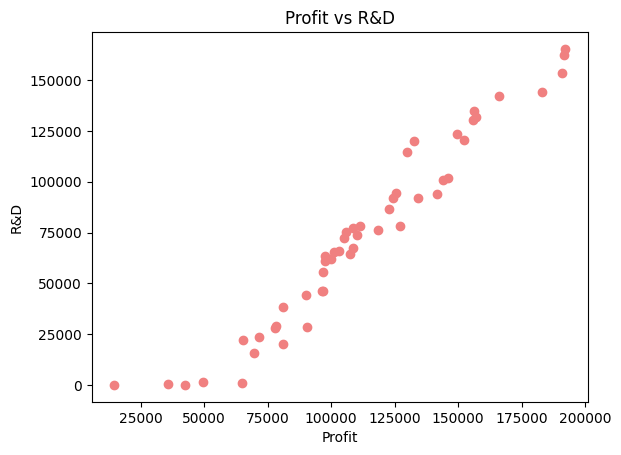

In [13]:
# Relationship between Profit and R&D
plt.scatter(df_start['Profit'], df_start['R&D Spend'], color='lightcoral')
plt.title('Profit vs R&D')
plt.xlabel('Profit')
plt.ylabel('R&D')
plt.show()

In [23]:
# Split the dataset into dependent and independent
X = df_start.iloc[:,:-1]
y = df_start.iloc[:,-1:]

In [24]:
# One Hot Encoding of categorical data
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = regressor.predict(X_test)

In [32]:
# Here we cannot plot scatter plot because independent variable are multiple
# np.set_printoptions(precision = 2)
# result = np.concatenate(y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1), 1)
# result

In [33]:
# coefficient and intercept
print(f'Coefficient of Rregression is : {regressor.coef_}')
print(f'Intercet of Regression is : {regressor.intercept_}')

Coefficient of Rregression is : [[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]]
Intercet of Regression is : [42467.53]


In [38]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error is : {mse}')

# R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-Squared is : {r2*100}')

# Adjusted R-Squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f'Adjusted R-Squared is : {adj_r2*100}')


Mean Squared Error is : 83502864.03256194
R-Squared is : 93.47068473282546
Adjusted R-Squared is : 80.41205419847638
